## Programming and Maths for AI: Task 1

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [24]:
np.random.seed(42) 

In [25]:
# load dataset
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [26]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [27]:
# distribution of Target Values in Dataset
df.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [28]:
# binary classification
# num > 0 => disease(1), else 0
y = (df["num"].astype(int) > 0).astype(int).values
X_df = df.drop(columns=["num", "id"]).copy()

In [29]:
# convert categorical columns to one-hot
cat_cols = X_df.select_dtypes(include=["object"]).columns.tolist()
if len(cat_cols) > 0:
    X_df = pd.get_dummies(X_df, columns=cat_cols, drop_first=False)
X_df.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,3.0,False,True,True,False,...,False,False,False,True,False,True,False,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,False,True,True,False,...,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [34]:
# splitting the dataset into train and testing which is 80% training and 20% testing
X_train_df, X_temp_df, y_train, y_temp = train_test_split(
    X_df, y, test_size=0.20, random_state=42, shuffle=True, stratify=y
)

# Now splitting the dataset into test and validation where 20% breaks down to 10% test and 10% validation
X_val_df, X_test_df, y_val, y_test = train_test_split(
    X_temp_df, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)
print(f"Training data: {X_train_df.shape}, Validation data: {X_val_df.shape}, Test data: {X_test_df.shape}")

Training data: (736, 29), Validation data: (92, 29), Test data: (92, 29)


In [35]:
# align dummy columns, use train columns as template (fill missing with 0)
X_val_df  = X_val_df.reindex(columns=X_train_df.columns, fill_value=0)
X_test_df = X_test_df.reindex(columns=X_train_df.columns, fill_value=0)

In [36]:
# Convert pandas DataFrame to NumPy 
X_train = X_train_df.values.astype(float)
X_val   = X_val_df.values.astype(float)
X_test  = X_test_df.values.astype(float)

In [37]:
# impute, fit on train
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_val   = imputer.transform(X_val)
X_test  = imputer.transform(X_test)

In [38]:
# scale, fit on train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [39]:
# network sizes
input_size  = X_train.shape[1]
output_size = len(np.unique(y_train))

In [40]:
# one-hot labels
y_train_oh = np.eye(output_size)[y_train]
y_val_oh   = np.eye(output_size)[y_val]
y_test_oh  = np.eye(output_size)[y_test]

In [41]:
# sanity check
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("input_size:", input_size, "output_size:", output_size)
print("Class balance:", np.bincount(y_train), np.bincount(y_test))
print("NaN:", np.isnan(X_train).sum(), np.isnan(X_test).sum())

X_train: (736, 29) X_test: (92, 29)
input_size: 29 output_size: 2
Class balance: [329 407] [41 51]
NaN: 0 0


In [42]:
import numpy as np

def sigmoid(x):

    s = 1/(1 + np.exp(-x))

    return s

def derivative_sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    ds = s*(1-s)

    return ds


ReLU and its derivative

In [43]:
def relu(x):
    return x * (x > 0)

def derivative_relu(x):
    return 1 * (x>0)

Now let's implement the softmax function

In [44]:
#def softmax(vector):
#    e = np.exp(vector)
#    return e / e.sum()

# if z is very large, exp(z) can overflow
# solution: subtract by max
def softmax(z): #stable, so we dont have exploding issues due to exp
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


### Implement a fully parametrizable neural network class

## Create a NN class

In [45]:
class NeuralNetwork:

    #hidden layer (sigmoid, relu)
    #output layer (softmax)

    def __init__(self, activation_function, no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, n_epochs,
                 lambda1,lambda2,lr,dropout, optimizer, momentum,beta1=0.9,beta2=0.999,eps=1e-8):
        self.hidden_layers = len(no_of_hidden_nodes)
        self.activation_function = activation_function
        self.no_of_input_nodes = no_of_input_nodes # as many as the dataset's features
        self.no_of_hidden_nodes = no_of_hidden_nodes # no fixed number, needs tuning
        self.no_of_output_nodes = no_of_output_nodes # as many as the output classes
        self.n_epochs = n_epochs #no. of epochs to run the NN
        self.lambda1 = lambda1 #lambda variable for L1 regularisation
        self.lambda2 = lambda2 #lambda variable for L2 regularisation
        self.learning_rate = lr #how much to update the weights
        self.z_values = [] # need to store for backprop
        self.a_values = []   # need to store for backprop, first value is the actual data
        self.dropout_masks = [] # save the masks for backprop
        self.dropout = dropout #probability for dropout
        self.weights, self.biases = self.weights_and_bias()
        
        #optimizer settings

        #---momentum SGD---
        self.optimizer = optimizer # the optimizer that will be used
        self.momentum = momentum
        self.vW = [np.zeros_like(W) for W in self.weights]  # velocity for momentum
        self.vb = [np.zeros_like(b) for b in self.biases]

        #---adam---
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.t = 0  # timestep

        self.moment1_W = [np.zeros_like(W) for W in self.weights] # moment1 weight initialization
        self.moment1_b = [np.zeros_like(b) for b in self.biases] # moment1 bias initialization

        self.moment2_W = [np.zeros_like(W) for W in self.weights] # moment2 weight initialization
        self.moment2_b = [np.zeros_like(b) for b in self.biases] # moment2 bias initialization



        

    def weights_and_bias(self):
        layers = [self.no_of_input_nodes] + self.no_of_hidden_nodes + [self.no_of_output_nodes] #e.g. [2,3,5,2]
        weights = [] #TODO: weight and bias proper initialization (xavier)
        biases = []
        for i in range(len((layers))-1):

            n_in = layers[i]
            n_out = layers[i+1]

            weights.append(2*np.random.random((n_in,n_out)) - 1)
            biases.append(np.zeros((1, n_out)))
        return weights, biases
    
    def inverted_dropout(self, x, p):
        # p = dropout probability
        mask = (np.random.rand(*x.shape) > p).astype(float)
        self.dropout_masks.append(mask)
        x_dropped = (x * mask)/(1 - p) # the actual dropout
        
        return x_dropped
    
    def forward_pass(self, X, training=True): #add training flag for dropout

        # Clear previous batch values
        self.a_values = []
        self.z_values = []
        self.dropout_masks = []

        #first hidden layer needs to have the actual data
        #all other hidden layers take the result from the previous layer
        a = X
        self.a_values.append(a) # save for backprop
        
        for layer in range(self.hidden_layers):

            W = self.weights[layer]
            b = self.biases[layer]
            z = np.dot(a, W) + b
            self.z_values.append(z) # save for backprop

            if self.activation_function =='sigmoid':
                a = sigmoid(z)
            elif self.activation_function =='relu':
                a = relu(z)
            #print(f'Shape of layer: {a.shape}')

            #implementing inverted dropout
            if training: # In testing, dropout is not applied
                a = self.inverted_dropout(a, self.dropout) 

            self.a_values.append(a) # save for backprop

        #---Output Layer---
        W = self.weights[-1]
        b = self.biases[-1]
        z = np.dot(a, W) + b
        self.z_values.append(z) # save for backprop
        a = softmax(z)
        self.a_values.append(a) # save for backprop
        #print(f'Shape of output layer: {a.shape}')
        return a
        

    def backward_pass(self, X_train, y_true):
        
        N = y_true.shape[0]

        # We convert labels to one-hot so that they match the shape of y_true
        y_one_hot = np.zeros((N, self.no_of_output_nodes))
        y_one_hot[np.arange(N), y_true] = 1

        # make empty lists for gradients
        dW = [None] * len(self.weights)
        db = [None] * len(self.biases)

        # --- Output layer ---
        delta = self.a_values[-1] - y_one_hot  # Derivative of loss: softmax + CE derivative (a(L) - y)
        
        dW[-1] = self.a_values[-2].T.dot(delta) / N

        dW[-1] += self.lambda1 * np.sign(self.weights[-1])   # L1 gradient
        dW[-1] += 2 * self.lambda2 * self.weights[-1]       # L2 gradient


        db[-1] = np.mean(delta, axis=0, keepdims=True) #gradient of bias

        #self.weights[-1] -= self.learning_rate * dW[-1] # update the weight
        #self.biases[-1] -= self.learning_rate * db[-1] # update the bias

        # --- Hidden layers ---
        for layer in range(self.hidden_layers - 1, -1, -1):

            # Backprop error
            delta = delta.dot(self.weights[layer + 1].T)

            #use dropout
            delta *= self.dropout_masks[layer]

            if self.activation_function =='sigmoid':
                delta *= derivative_sigmoid(self.z_values[layer])
            elif self.activation_function =='relu':
                delta *= derivative_relu(self.z_values[layer])
            
            a_prev = X_train if layer == 0 else self.a_values[layer]
            dW[layer] = a_prev.T.dot(delta) / N 
            db[layer] = np.mean(delta, axis=0, keepdims=True) #gradient of bias

            dW[layer] += self.lambda1 * np.sign(self.weights[layer])   # L1 gradient
            dW[layer] += 2 * self.lambda2 * self.weights[layer]       # L2 gradient

            
            #self.weights[layer] -= self.learning_rate * dW[layer] # update the weight
            #self.biases[layer] -= self.learning_rate * db[layer] # update the bias

        self.choose_optimizer(dW, db)




    def compute_loss(self, y_pred, y_true):
        '''
        Cross entropy loss for multi-class classification with L1 and L2 regularization
        '''

        # number of samples
        N = y_true.shape[0]
        
        correct_probs = y_pred[np.arange(N), y_true] #TODO: change to binary formula if dataset is binary

        eps = 1e-15
        correct_probs = np.clip(correct_probs, eps, 1.0) #forces every number to be within a range to exlude 0 where log(0) -> inf

        # loss = average of -log(p) whre p is the predicted probability of the correct class
        loss = -np.sum(np.log(correct_probs)) / N

        l1_loss = self.lambda1 * sum(np.sum(np.abs(W)) for W in self.weights)
        l2_loss = self.lambda2 * sum(np.sum(W**2) for W in self.weights)

        return loss + l1_loss + l2_loss
    
    def choose_optimizer(self, dW, db): # function to call the respective optimizer method to be used
        if self.optimizer == "momentum":
            self.momentum_update(dW, db)
        elif self.optimizer == "adam":
            self.adam_update(dW, db)
        else:
            raise ValueError("Unsupported optimizer")
        
    def momentum_update(self,dW,db):
        for i in range(len(self.weights)):
            self.vW[i] = self.momentum * self.vW[i] + (1 - self.momentum) * dW[i]
            self.vb[i] = self.momentum * self.vb[i] + (1 - self.momentum) * db[i]
            self.weights[i] -= self.learning_rate * self.vW[i]
            self.biases[i]  -= self.learning_rate * self.vb[i]

    def adam_update(self,dW,db):
        self.t += 1
        for i in range(len(self.weights)):
            self.moment1_W[i] = self.beta1 * self.moment1_W[i] + (1 - self.beta1) * dW[i]
            self.moment1_b[i] = self.beta1 * self.moment1_b[i] + (1 - self.beta1) * db[i]
            self.moment2_W[i] = self.beta2 * self.moment2_W[i] + (1 - self.beta2) * (dW[i] ** 2)
            self.moment2_b[i] = self.beta2 * self.moment2_b[i] + (1 - self.beta2) * (db[i] ** 2)
            
            mW_hat = self.moment1_W[i] / (1 - self.beta1 ** self.t)
            vW_hat = self.moment2_W[i] / (1 - self.beta2 ** self.t)
            mb_hat = self.moment1_b[i] / (1 - self.beta1 ** self.t)
            vb_hat = self.moment2_b[i] / (1 - self.beta2 ** self.t)
            
            self.weights[i] -= self.learning_rate * mW_hat / (np.sqrt(vW_hat) + self.eps)
            self.biases[i]  -= self.learning_rate * mb_hat / (np.sqrt(vb_hat) + self.eps)


    




In [46]:
#Param tuning:
#lambda1 and lambda 2 can be from 0 to 1

nn = NeuralNetwork(
    activation_function='relu',
    no_of_input_nodes=input_size,
    no_of_hidden_nodes=[64, 32],
    no_of_output_nodes=output_size,
    n_epochs=200,
    lambda1=0.0,
    lambda2=0.0,
    lr=0.001,
    dropout=0.2,
    optimizer="adam",
    momentum=0.9
    )

for epoch in range(nn.n_epochs):
    # Forward pass
    y_pred = nn.forward_pass(X_train, training=True)

    # Loss function
    loss = nn.compute_loss(y_pred, y_train)

    # Backward pass
    nn.backward_pass(X_train, y_train)

    if epoch % 5 == 0:
        y_pred_labels = np.argmax(y_pred, axis=1)
        accuracy = np.mean(y_pred_labels == y_train)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")




Epoch 0, Loss: 15.4216, Accuracy: 0.4470
Epoch 5, Loss: 13.6781, Accuracy: 0.4864
Epoch 10, Loss: 13.0302, Accuracy: 0.4905
Epoch 15, Loss: 12.1425, Accuracy: 0.4986
Epoch 20, Loss: 11.5819, Accuracy: 0.5041
Epoch 25, Loss: 10.1727, Accuracy: 0.5421
Epoch 30, Loss: 10.1983, Accuracy: 0.5394
Epoch 35, Loss: 8.9314, Accuracy: 0.5734
Epoch 40, Loss: 7.9116, Accuracy: 0.6033
Epoch 45, Loss: 7.6164, Accuracy: 0.6196
Epoch 50, Loss: 7.5225, Accuracy: 0.6155
Epoch 55, Loss: 7.3611, Accuracy: 0.6372
Epoch 60, Loss: 6.8852, Accuracy: 0.6413
Epoch 65, Loss: 6.1476, Accuracy: 0.6671
Epoch 70, Loss: 5.8240, Accuracy: 0.6970
Epoch 75, Loss: 5.6998, Accuracy: 0.6902
Epoch 80, Loss: 6.3513, Accuracy: 0.6739
Epoch 85, Loss: 5.8842, Accuracy: 0.6726
Epoch 90, Loss: 5.3942, Accuracy: 0.7120
Epoch 95, Loss: 5.6126, Accuracy: 0.6943
Epoch 100, Loss: 4.8690, Accuracy: 0.7283
Epoch 105, Loss: 4.7564, Accuracy: 0.7296
Epoch 110, Loss: 4.5171, Accuracy: 0.7351
Epoch 115, Loss: 4.4960, Accuracy: 0.7418
Epoch 1

In [47]:
y_pred = nn.forward_pass(X_train, training=False)
y_pred_labels = np.argmax(y_pred, axis=1)

train_accuracy = np.mean(y_pred_labels == y_train)
print("Training accuracy:", train_accuracy)


Training accuracy: 0.8342391304347826


In [48]:
y_val_pred = nn.forward_pass(X_val, training=False)
y_val_labels = np.argmax(y_val_pred, axis=1)

val_accuracy = np.mean(y_val_labels == y_val)
print("Validation accuracy:", val_accuracy)


Validation accuracy: 0.8369565217391305


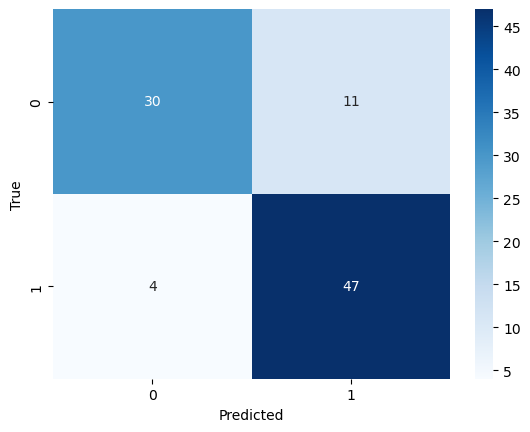

In [49]:
from sklearn.metrics import confusion_matrix

y_val_pred_labels = np.argmax(y_val_pred, axis=1)
cm = confusion_matrix(y_val, y_val_pred_labels)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [50]:
print("Row sum:", np.sum(y_pred[0]))
print("Min prob:", np.min(y_pred))
print("Max prob:", np.max(y_pred))


Row sum: 1.0
Min prob: 7.473833691740201e-38
Max prob: 1.0


### Evaluate different parameters

Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=adam, mom=0.0
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=momentum, mom=0.8
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=momentum, mom=0.9
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0, opt=momentum, mom=0.99
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=adam, mom=0.0
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=momentum, mom=0.8
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=momentum, mom=0.9
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.0001, opt=momentum, mom=0.99
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.001, opt=adam, mom=0.0
Training: act=sigmoid, hidden=[32, 32], lr=0.001, drop=0.0, l1=0.0, l2=0.001, opt=momentum, mom=0.8
Training: act=

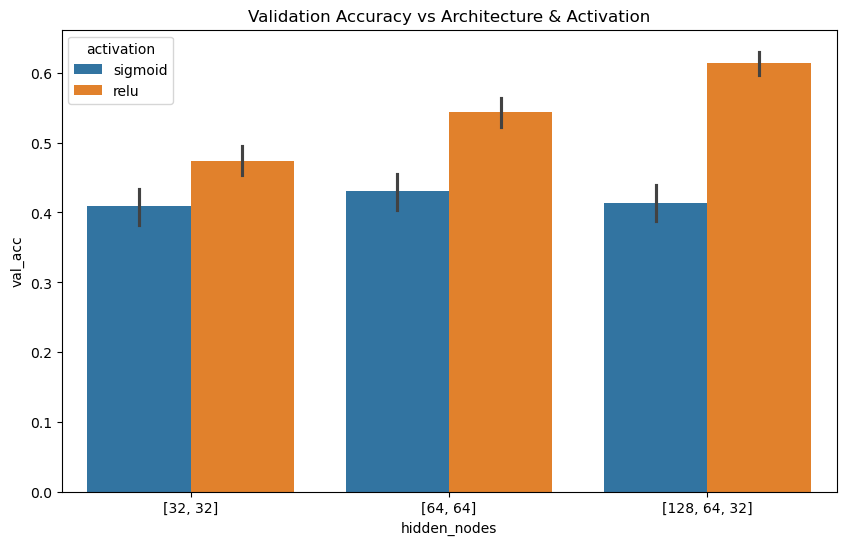

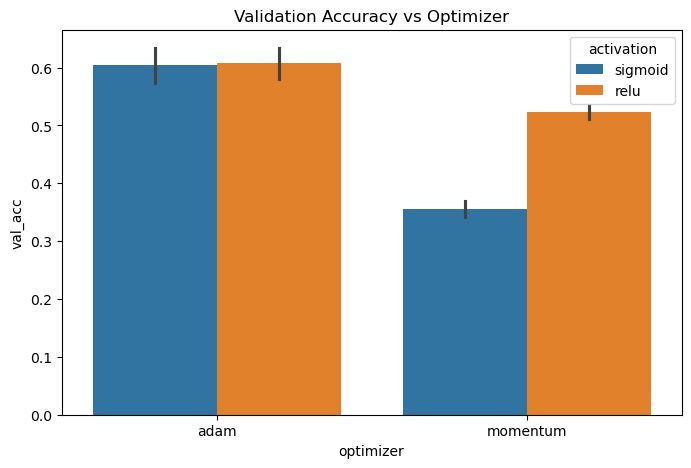

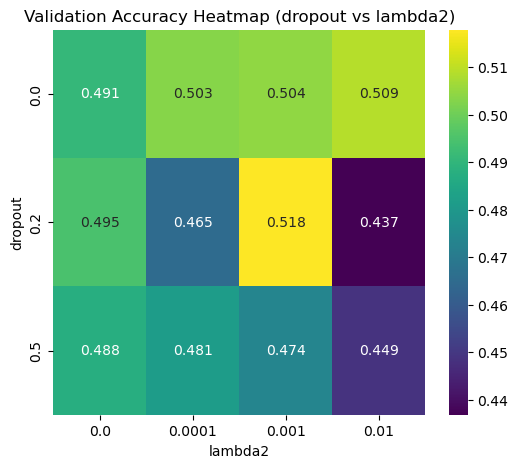

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your NeuralNetwork class is already defined and imported

# -------------------------------
# Define hyperparameter ranges
# -------------------------------
activations = ['sigmoid', 'relu']
hidden_nodes_list = [[32,32], [64,64], [128,64,32]]
learning_rates = [0.001, 0.0001]
dropouts = [0.0, 0.2, 0.5]
lambda1_list = [0.0, 1e-4, 1e-3]
lambda2_list = [0.0,1e-4, 1e-3, 1e-2]
optimizers = ['adam', 'momentum']
momentum_values = [0.8, 0.9, 0.99]

n_epochs = 100  # Adjust if needed

# -------------------------------
# Prepare results storage
# -------------------------------
results = []

# -------------------------------
# Loop over hyperparameter combinations
# -------------------------------
for activation in activations:
    for hidden_nodes in hidden_nodes_list:
        for lr in learning_rates:
            for dropout in dropouts:
                for lambda1 in lambda1_list:
                    for lambda2 in lambda2_list:
                        for optimizer in optimizers:
                            # Momentum is only used for momentum optimizer
                            momentum_opts = momentum_values if optimizer=='momentum' else [0.0]

                            for momentum in momentum_opts:
                                print(f"Training: act={activation}, hidden={hidden_nodes}, lr={lr}, drop={dropout}, l1={lambda1}, l2={lambda2}, opt={optimizer}, mom={momentum}")

                                # Initialize neural network
                                nn = NeuralNetwork(
                                    activation_function=activation,
                                    no_of_input_nodes=X_train.shape[1],
                                    no_of_hidden_nodes=hidden_nodes,
                                    no_of_output_nodes=3,
                                    n_epochs=n_epochs,
                                    lr=lr,
                                    lambda1=lambda1,
                                    lambda2=lambda2,
                                    dropout=dropout,
                                    optimizer=optimizer,
                                    momentum=momentum
                                )

                                # Train the network
                                for epoch in range(n_epochs):
                                    # Forward pass
                                    y_pred_train = nn.forward_pass(X_train, training=True)
                                    # Compute loss
                                    loss = nn.compute_loss(y_pred_train, y_train)
                                    # Backward pass
                                    nn.backward_pass(X_train, y_train)

                                # Evaluate training accuracy
                                y_train_pred = nn.forward_pass(X_train, training=False)
                                y_train_labels = np.argmax(y_train_pred, axis=1)
                                train_acc = np.mean(y_train_labels == y_train)

                                # Evaluate validation accuracy
                                y_val_pred = nn.forward_pass(X_val, training=False)
                                y_val_labels = np.argmax(y_val_pred, axis=1)
                                val_acc = np.mean(y_val_labels == y_val)

                                # Save results
                                results.append({
                                    'activation': activation,
                                    'hidden_nodes': str(hidden_nodes),
                                    'lr': lr,
                                    'dropout': dropout,
                                    'lambda1': lambda1,
                                    'lambda2': lambda2,
                                    'optimizer': optimizer,
                                    'momentum': momentum,
                                    'train_acc': train_acc,
                                    'val_acc': val_acc,
                                    'final_loss': loss
                                })

# -------------------------------
# Convert results to DataFrame
# -------------------------------
df_results = pd.DataFrame(results)
df_results.to_csv("nn_hyperparam_results.csv", index=False)
print("Saved results to nn_hyperparam_results.csv")

# -------------------------------
# Plotting examples
# -------------------------------

# 1. Validation accuracy vs architecture
plt.figure(figsize=(10,6))
sns.barplot(x='hidden_nodes', y='val_acc', hue='activation', data=df_results)
plt.title("Validation Accuracy vs Architecture & Activation")
plt.show()

# 2. Validation accuracy vs optimizer
plt.figure(figsize=(8,5))
sns.barplot(x='optimizer', y='val_acc', hue='activation', data=df_results)
plt.title("Validation Accuracy vs Optimizer")
plt.show()

# 3. Heatmap for dropout and lambda2
subset = df_results[df_results['lambda1']==0.0]
pivot_table = subset.pivot_table(values='val_acc', index='dropout', columns='lambda2')
plt.figure(figsize=(6,5))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
plt.title("Validation Accuracy Heatmap (dropout vs lambda2)")
plt.show()


In [52]:
df_results

,activation,hidden_nodes,lr,dropout,lambda1,lambda2,optimizer,momentum,train_acc,val_acc,final_loss
0,sigmoid,"[32, 32]",0.0010,0.0,0.000,0.0000,adam,0.00,0.826087,0.847826,0.416266
1,sigmoid,"[32, 32]",0.0010,0.0,0.000,0.0000,momentum,0.80,0.447011,0.445652,1.070970
2,sigmoid,"[32, 32]",0.0010,0.0,0.000,0.0000,momentum,0.90,0.448370,0.434783,0.981005
3,sigmoid,"[32, 32]",0.0010,0.0,0.000,0.0000,momentum,0.99,0.398098,0.380435,1.272504
4,sigmoid,"[32, 32]",0.0010,0.0,0.000,0.0001,adam,0.00,0.797554,0.793478,0.546209
...,...,...,...,...,...,...,...,...,...,...,...
1723,relu,"[128, 64, 32]",0.0001,0.5,0.001,0.0010,momentum,0.99,0.456522,0.489130,30.812486
1724,relu,"[128, 64, 32]",0.0001,0.5,0.001,0.0100,adam,0.00,0.460598,0.402174,74.960168
1725,relu,"[128, 64, 32]",0.0001,0.5,0.001,0.0100,momentum,0.80,0.489130,0.500000,73.591808
1726,relu,"[128, 64, 32]",0.0001,0.5,0.001,0.0100,momentum,0.90,0.497283,0.521739,72.405330


In [53]:
max(df_results['val_acc'])

0.8913043478260869